# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
import json
from scipy.stats import linregress

# Import API key
weather_key = "ed1ec73c643b9da20bb3e36644d5c60a"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [29]:
#Build URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
weather_key = "ed1ec73c643b9da20bb3e36644d5c60a"
appid = weather_key
settings = {"units": "imperial", "appid": weather_key}
url = f"{url}appid={weather_key}&units={units}"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_df = city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | little current
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=little%20current
Processing Record 2 of Set 1 | trairi
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=trairi
Processing Record 3 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=rikitea
Processing Record 4 of Set 1 | egvekinot
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=egvekinot
Processing Record 5 of Set 1 | sabang
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=sabang
Processing Record 6 of Set 1 | bur gabo
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=bur%20gabo
City not found...
Pr

Processing Record 2 of Set 2 | moron
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=moron
Processing Record 3 of Set 2 | ramasukha
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=ramasukha
City not found...
Processing Record 4 of Set 2 | new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=new%20norfolk
Processing Record 5 of Set 2 | carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=carnarvon
Processing Record 6 of Set 2 | belyy yar
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=belyy%20yar
Processing Record 7 of Set 2 | torres
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=torres
Processing Record 8 of Set 2 | coquimbo
http://api.openweatherma

Processing Record 5 of Set 3 | biak
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=biak
Processing Record 6 of Set 3 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=busselton
Processing Record 7 of Set 3 | jamsa
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=jamsa
Processing Record 8 of Set 3 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=saskylakh
Processing Record 9 of Set 3 | kahului
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=kahului
Processing Record 10 of Set 3 | verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=verkhnevilyuysk
Processing Record 11 of Set 3 | xining
http://api.openweathermap.org/data/2.5/weather

Processing Record 8 of Set 4 | barentsburg
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=barentsburg
City not found...
Processing Record 9 of Set 4 | meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=meulaboh
Processing Record 10 of Set 4 | chagda
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=chagda
City not found...
Processing Record 11 of Set 4 | la sarre
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=la%20sarre
Processing Record 12 of Set 4 | qui nhon
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=qui%20nhon
Processing Record 13 of Set 4 | kargil
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=kargil
Processing Record 14 of Set 4 | maningrida
htt

Processing Record 11 of Set 5 | takikawa
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=takikawa
Processing Record 12 of Set 5 | sakakah
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=sakakah
Processing Record 13 of Set 5 | port jervis
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=port%20jervis
Processing Record 14 of Set 5 | reconquista
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=reconquista
Processing Record 15 of Set 5 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=mar%20del%20plata
Processing Record 16 of Set 5 | guayape
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=guayape
Processing Record 17 of Set 5 | berlevag
http://api.openwe

Processing Record 14 of Set 6 | chuy
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=chuy
Processing Record 15 of Set 6 | namibe
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=namibe
Processing Record 16 of Set 6 | santa ana
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=santa%20ana
Processing Record 17 of Set 6 | conceicao do araguaia
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=conceicao%20do%20araguaia
Processing Record 18 of Set 6 | mwene-ditu
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=mwene-ditu
Processing Record 19 of Set 6 | pisco
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=pisco
Processing Record 20 of Set 6 | port augusta
http://api.openwe

Processing Record 17 of Set 7 | hvide sande
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=hvide%20sande
Processing Record 18 of Set 7 | miles city
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=miles%20city
Processing Record 19 of Set 7 | taltal
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=taltal
Processing Record 20 of Set 7 | seoul
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=seoul
Processing Record 21 of Set 7 | cayenne
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=cayenne
Processing Record 22 of Set 7 | hofn
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=hofn
Processing Record 23 of Set 7 | balangir
http://api.openweathermap.org/data/2.5/weather?

Processing Record 20 of Set 8 | teya
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=teya
Processing Record 21 of Set 8 | urdzhar
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=urdzhar
City not found...
Processing Record 22 of Set 8 | maldonado
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=maldonado
Processing Record 23 of Set 8 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=havre-saint-pierre
Processing Record 24 of Set 8 | khawhai
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=khawhai
Processing Record 25 of Set 8 | evensk
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=evensk
Processing Record 26 of Set 8 | sibolga
http://api.openwea

Processing Record 24 of Set 9 | sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=sao%20filipe
Processing Record 25 of Set 9 | kalabo
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=kalabo
Processing Record 26 of Set 9 | san joaquin
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=san%20joaquin
Processing Record 27 of Set 9 | dole
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=dole
Processing Record 28 of Set 9 | santa marta de tormes
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=santa%20marta%20de%20tormes
Processing Record 29 of Set 9 | balatonfuzfo
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=balatonfuzfo
Processing Record 30 of Set 9 | pandan
h

Processing Record 27 of Set 10 | marystown
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=marystown
Processing Record 28 of Set 10 | sur
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=sur
Processing Record 29 of Set 10 | gornorechenskiy
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=gornorechenskiy
Processing Record 30 of Set 10 | cap malheureux
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=cap%20malheureux
Processing Record 31 of Set 10 | bongandanga
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=bongandanga
Processing Record 32 of Set 10 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=saint-joseph
Processing Record 33 of Set 10 | formosa
h

Processing Record 30 of Set 11 | isla vista
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=isla%20vista
Processing Record 31 of Set 11 | honningsvag
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=honningsvag
Processing Record 32 of Set 11 | buraydah
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=buraydah
Processing Record 33 of Set 11 | duluth
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=duluth
Processing Record 34 of Set 11 | kholmogory
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=kholmogory
Processing Record 35 of Set 11 | saleilua
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=saleilua
City not found...
Processing Record 36 of Set 11 | amapa
http://

Processing Record 33 of Set 12 | batticaloa
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=batticaloa
Processing Record 34 of Set 12 | bukachacha
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=bukachacha
Processing Record 35 of Set 12 | muravlenko
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=muravlenko
Processing Record 36 of Set 12 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=srednekolymsk
Processing Record 37 of Set 12 | marsaxlokk
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=marsaxlokk
Processing Record 38 of Set 12 | henzada
http://api.openweathermap.org/data/2.5/weather?appid=ed1ec73c643b9da20bb3e36644d5c60a&units=imperial&q=henzada
City not found...
Processing Record 39 of Set 12 | m

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Export the City_Data into a csv
city_data_pd.to_csv("WeatherPy.csv",encoding="utf-8",index=False)

# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,little current,45.9793,-81.9248,78.89,76,100,9.57,CA,1630172161
1,trairi,-3.2778,-39.2689,87.03,47,65,17.52,BR,1630172161
2,rikitea,-23.1203,-134.9692,73.49,72,1,20.69,PF,1630172162
3,egvekinot,66.3167,-179.1667,36.30,92,100,4.12,RU,1630172162
4,sabang,5.8933,95.3214,82.72,71,94,15.95,ID,1630172162


In [32]:
#Make sure none of the cities has a humidity > 100. Per the describe data, max humidity is 100. 
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,21.320150,15.374598,68.170268,69.851521,54.910555,7.996547,1.630172e+09
std,33.169098,89.863305,16.057154,21.914819,38.083137,5.505335,7.996065e+01
min,-54.800000,-179.166700,30.850000,9.000000,0.000000,0.000000,1.630172e+09
25%,-6.202000,-63.309700,54.740000,58.000000,17.000000,4.000000,1.630172e+09
50%,28.017000,18.050000,70.520000,74.000000,61.000000,6.910000,1.630172e+09
75%,49.024950,95.044050,79.520000,87.000000,93.500000,10.650000,1.630172e+09
max,78.218600,179.316700,106.070000,100.000000,100.000000,35.390000,1.630172e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

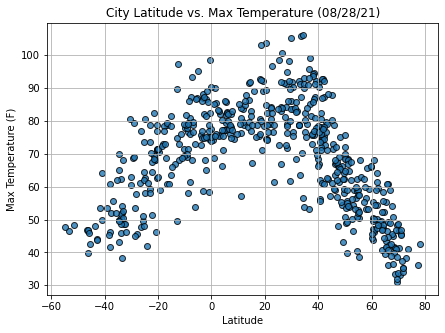

This plot is supporting the notion that the closer you are to the equator or 0 degrees latitude the hotter or higher the temperature.


In [55]:
#Enlarge figure
plt.figure(figsize=(7,5))
# Build scatter plot for latitude vs temperature
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Latitude vs Temperature (F).png")

# Show plot
plt.show()

#Print Analysis
print(f"This plot is supporting the notion that the closer you are to the equator or 0 degrees latitude the hotter or higher the temperature.")


## Latitude vs. Humidity Plot

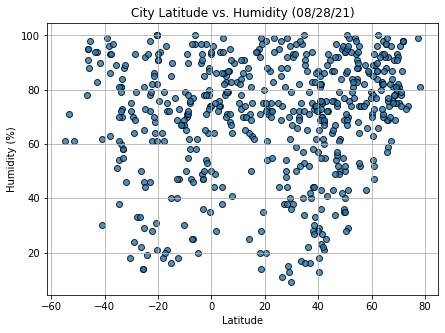

This plot is analyzing the city's distance from the equator to the % of humidity. There seems to be no correlation.


In [54]:
#Enlarge figure
plt.figure(figsize=(7,5))
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Latitude vs Humidity (%).png")

# Show plot
plt.show()

#Print Analysis
print(f"This plot is analyzing the city's distance from the equator to the % of humidity. There seems to be no correlation.")

## Latitude vs. Cloudiness Plot

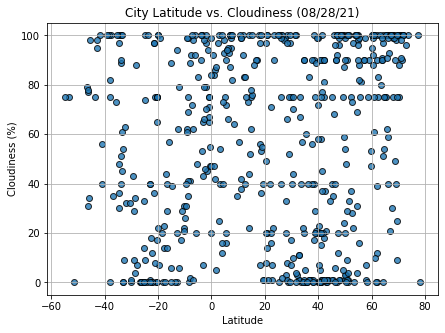

This plot is analyzing the city's distance from the equator as it relates to the % of cloudiness in that city. There seems to be no correlation.


In [53]:
#Enlarge figure
plt.figure(figsize=(7,5))
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Cloudiness (%).png")

# Show plot
plt.show()

#Print Analysis
print(f"This plot is analyzing the city's distance from the equator as it relates to the % of cloudiness in that city. There seems to be no correlation.")

## Latitude vs. Wind Speed Plot

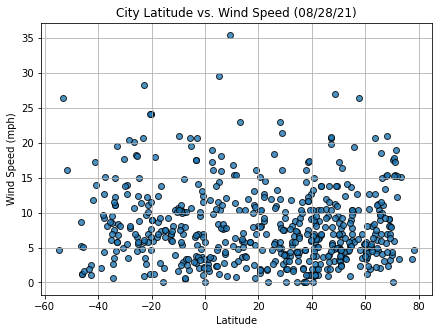

In [36]:
#Enlarge figure
plt.figure(figsize=(7,5))
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Wind Speed (MPH).png")

# Show plot
plt.show()

#Print Analysis
print(f"This plot is analyzing the city's distance from the equator as it relates to thewind speed in that city. There seems to be no correlation.")

## Linear Regression

In [38]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_data_pd.loc[city_data_pd["Lat"] >= 0]
southern_df = city_data_pd.loc[city_data_pd["Lat"] < 0]

The r-squared is: 0.5545770016508615
The linear equation is: y = -0.63x + 93.89


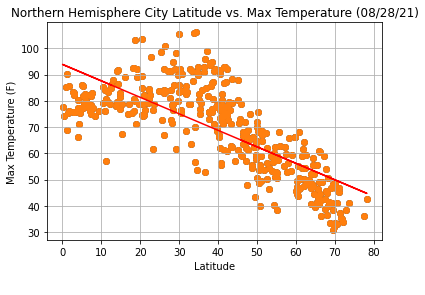

In [44]:
# Build scatter plot for latitude vs temperature
plt.scatter(northern_df["Lat"], 
            northern_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Add linear regression
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Print
print(f"The r-squared is: {rvalue**2}")
print(f"The linear equation is: {line_eq}")


# Save the figure
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5633717317922722
The linear equation is: y = 0.77x + 82.06


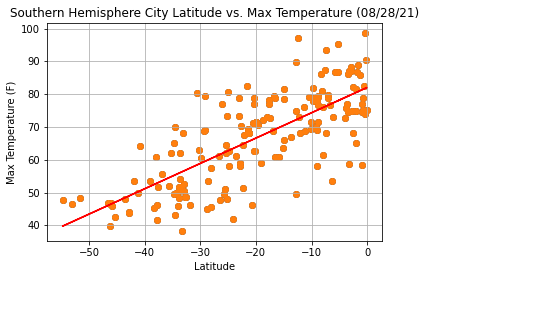

The Northern hemisphere and southern hemisphere plots confirm the notion that the closer you get to the equator the higher the temperature is in those cities.


In [56]:
# Build scatter plot for latitude vs temperature
plt.scatter(southern_df["Lat"], 
            southern_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Add linear regression
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Print
print(f"The r-squared is: {rvalue**2}")
print(f"The linear equation is: {line_eq}")

# Save the figure
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

# Show plot
plt.show()

#Print Analysis
print(f"The Northern hemisphere and southern hemisphere plots confirm the notion that the closer you get to the equator the higher the temperature is in those cities.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.5545770016508615
The linear equation is: y = -0.63x + 93.89


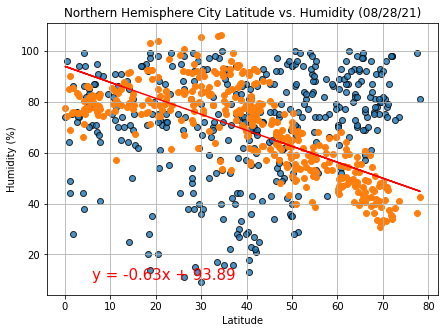

In [45]:
#Enlarge figure
plt.figure(figsize=(7,5))
# Build the scatter plots for each city types
plt.scatter(northern_df["Lat"], 
            northern_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Add linear regression
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Print
print(f"The r-squared is: {rvalue**2}")
print(f"The linear equation is: {line_eq}")

# Save the figure
plt.savefig("Northern Hemisphere City Latitude vs. Humidity (%).png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.5633717317922722
The linear equation is: y = 0.77x + 82.06


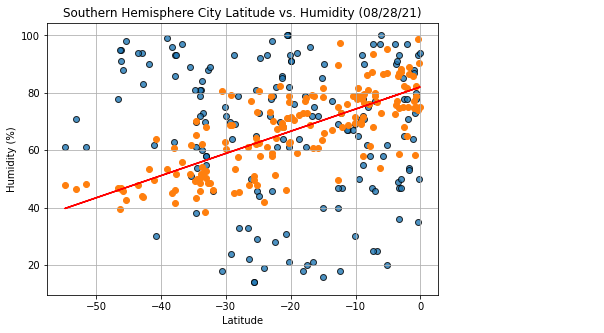

In [58]:
#Enlarge figure
plt.figure(figsize=(7,5))
# Build the scatter plots for each city types
plt.scatter(southern_df["Lat"], 
            southern_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Add linear regression
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Print
print(f"The r-squared is: {rvalue**2}")
print(f"The linear equation is: {line_eq}")

# Save the figure
plt.savefig("Southern Hemisphere City Latitude vs. Humidity (%).png")

# Show plot
plt.show()



In [60]:
#Print Analysis 
(f"When the hemispheres were combined, I assumed there was no correlation between latitude location and humidity, but in looking at the linear regression of the two separate hemispheres, we can see that in the further south or north you are away from the equator the less humidity. Which makes sense because the further away you are the lower the temperature as well. Humidity is normally accompanied by heat/higher temperatures.")

'When the hemispheres were combined, I assumed there was no correlation between latitude location and humidity, but in looking at the linear regression of the two separate hemispheres, we can see that in the further south or north you are away from the equator the less humidity. Which makes sense because the further away you are the lower the temperature as well. Humidity is normally accompanied by heat/higher temperatures.'

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.5545770016508615
The linear equation is: y = -0.63x + 93.89


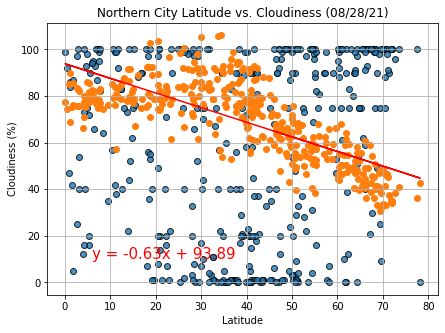

In [47]:
#Enlarge figure
plt.figure(figsize=(7,5))
# Build the scatter plots for each city types
plt.scatter(northern_df["Lat"], 
            northern_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Northern City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Add linear regression
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Print
print(f"The r-squared is: {rvalue**2}")
print(f"The linear equation is: {line_eq}")

# Save the figure
plt.savefig("Northern City Latitude vs Cloudiness (%).png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.5633717317922722
The linear equation is: y = 0.77x + 82.06


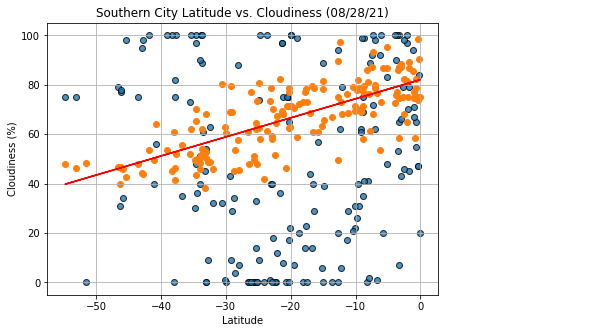

When the hemispheres were combined, I assumed there was no correlation between latitude location and cloudiness, but in looking at the linear regression of the two separate hemispheres, as it relates to the majority of the data, we can see that the closer you are to the equator the cloudier the city is likely to be. 


In [61]:
#Enlarge figure
plt.figure(figsize=(7,5))
# Build the scatter plots for each city types
plt.scatter(southern_df["Lat"], 
            southern_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Southern City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Add linear regression
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Print
print(f"The r-squared is: {rvalue**2}")
print(f"The linear equation is: {line_eq}")

# Save the figure
plt.savefig("Southern City Latitude vs Cloudiness (%).png")

# Show plot
plt.show()

#Print Analysis 
print(f"When the hemispheres were combined, I assumed there was no correlation between latitude location and cloudiness, but in looking at the linear regression of the two separate hemispheres, as it relates to the majority of the data, we can see that the closer you are to the equator the cloudier the city is likely to be. ")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.5545770016508615
The linear equation is: y = -0.63x + 93.89


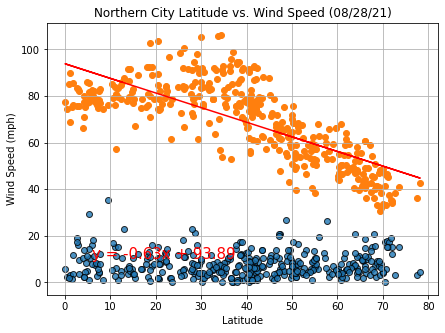

In [49]:
#Enlarge figure
plt.figure(figsize=(7,5))
# Build the scatter plots for each city types
plt.scatter(northern_df["Lat"], 
            northern_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Northern City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Add linear regression
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Print
print(f"The r-squared is: {rvalue**2}")
print(f"The linear equation is: {line_eq}")


# Save the figure
plt.savefig("Northern City Latitude vs Wind Speed (MPH).png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.5633717317922722
The linear equation is: y = 0.77x + 82.06


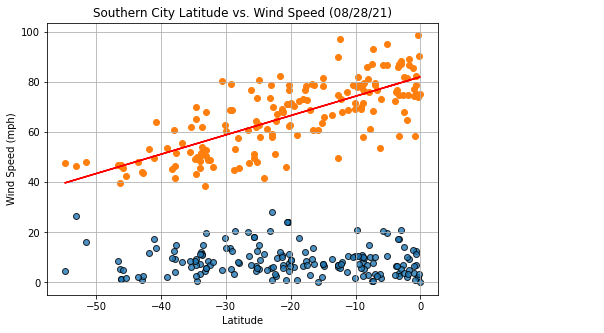

In [50]:
#Enlarge figure
plt.figure(figsize=(7,5))
# Build the scatter plots for each city types
plt.scatter(southern_df["Lat"], 
            southern_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Southern City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Add linear regression
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Print
print(f"The r-squared is: {rvalue**2}")
print(f"The linear equation is: {line_eq}")


# Save the figure
plt.savefig("Southern City Latitude vs Wind Speed (MPH).png")

# Show plot
plt.show()

In [62]:
#Print Analysis 
print(f"Whether the hemispheres are combined or separated, I think there’s no correlation between latitude location and wind speeds. For both the northern and southern hemisphere there are some cities that follow the notion that the closer you are to the equator the higher the wind speeds in those cities, but there are some cities that sit in the no/low wind zone no matter the distance too or from the equator. ")

Whether the hemispheres are combined or separated, I think there’s no correlation between latitude location and wind speeds. For both the northern and southern hemisphere there are some cities that follow the notion that the closer you are to the equator the higher the wind speeds in those cities, but there are some cities that sit in the no/low wind zone no matter the distance too or from the equator. 
